In [43]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *
from skimage.util.shape import view_as_blocks
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max

#My image
file_path = '../pma files/hel1.pma'
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../pma files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

Image Size: 512 x 512
Sucessfully generated average frame


In [44]:
#Chanel 1 image
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#CH1 image path
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

print(f"Average CH1 Frame Data- shape: {avg_frame_data_CH1.shape}")
print(f"Average CH1 Frame Data- Type: {type(avg_frame_data_CH1)}")
print(f"Average CH1 Frame Data- dType: {avg_frame_data_CH1.dtype}")

print(f"\nAverage CH2 Frame Data- shape: {avg_frame_data_CH2.shape}")
print(f"Average CH2 Frame Data- Type: {type(avg_frame_data_CH2)}")
print(f"Average CH2 Frame Data- dType: {avg_frame_data_CH2.dtype}")

Average CH1 Frame Data- shape: (512, 256)
Average CH1 Frame Data- Type: <class 'numpy.ndarray'>
Average CH1 Frame Data- dType: uint8

Average CH2 Frame Data- shape: (512, 256)
Average CH2 Frame Data- Type: <class 'numpy.ndarray'>
Average CH2 Frame Data- dType: uint8


In [45]:
# #SAME find_peaks_scipy_IDL function as in imv_avg.ipynb file
# def find_peaks_scipy_IDL(image_path, sigma=3, block_size=16, scaler_percent=32):
#     std = 4*sigma
#     # Load image (assumes grayscale uint8 image)
#     image = io.imread(image_path, as_gray=True).astype(np.uint8)
#     height, width = image.shape
#     image_1 = image.copy()
#     min_intensity = np.min(image_1)
#     max_intensity = np.max(image_1)
#     threshold = min_intensity + (scaler_percent / 100.0) * (max_intensity - min_intensity)
        
#     background = np.zeros((height, width), dtype=np.float32)

#     for i in range(8, height, block_size):
#         for j in range(8, width, block_size):
#             background[(i-8)//block_size, (j-8)//block_size] = np.min(image_1[i-8:i+8, j-8:j+8])
        
#     # Subtract background
#     background = np.clip(background.astype(np.uint8) - 10, 0, 255)
#     image_1 = image - background
        
#     image_2 = image_1.copy()
#     med = np.median(image_1)

#     # Apply threshold
#     image_2[image_2 < (med + 3*std)] = 0
#     correct_size_peaks = []
#     large_peaks = []
    
#     # Detect peaks using peak_local_max
#     peak_coords = peak_local_max(image_2, min_distance=int(sigma), threshold_abs=threshold)
    
#     return peak_coords, image_2


In [46]:
# #Same Good Peaks as in img_avg.ipynb file
# def good_peak_finder(image_path, sigma=3, block_size=16, scaler_percent=32, boarder=10, max_rad=3):
#     peaks_coords_IDL, image_2 = find_peaks_scipy_IDL(image_path, sigma, block_size, scaler_percent)
#     large_peaks = []
#     correct_size_peaks = []
#     height, width = io.imread(image_path).shape

#     for peak in peaks_coords_IDL:
#         y, x = peak
#         # Extract the peak region, if pixels outside of 5x5 region are non-zero, then append peak to large_peaks
#         if image_2[y, x + max_rad+1] > 0 or image_2[y, x - max_rad] > 0 or image_2[y+max_rad+1, x ] > 0 or image_2[y-max_rad, x] > 0 or peak[0] < boarder or peak[0] > height - boarder or peak[1] < boarder or peak[1] > width - boarder:
#             large_peaks.append(peak)
#         else:
#             correct_size_peaks.append(peak)

#     correct_size_peaks = np.array(correct_size_peaks)
#     large_peaks = np.array(large_peaks)
    
#     return correct_size_peaks, large_peaks


In [47]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2 = find_peaks_scipy_IDL(CH2_img_path)[0]

/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_16789/1338734088.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


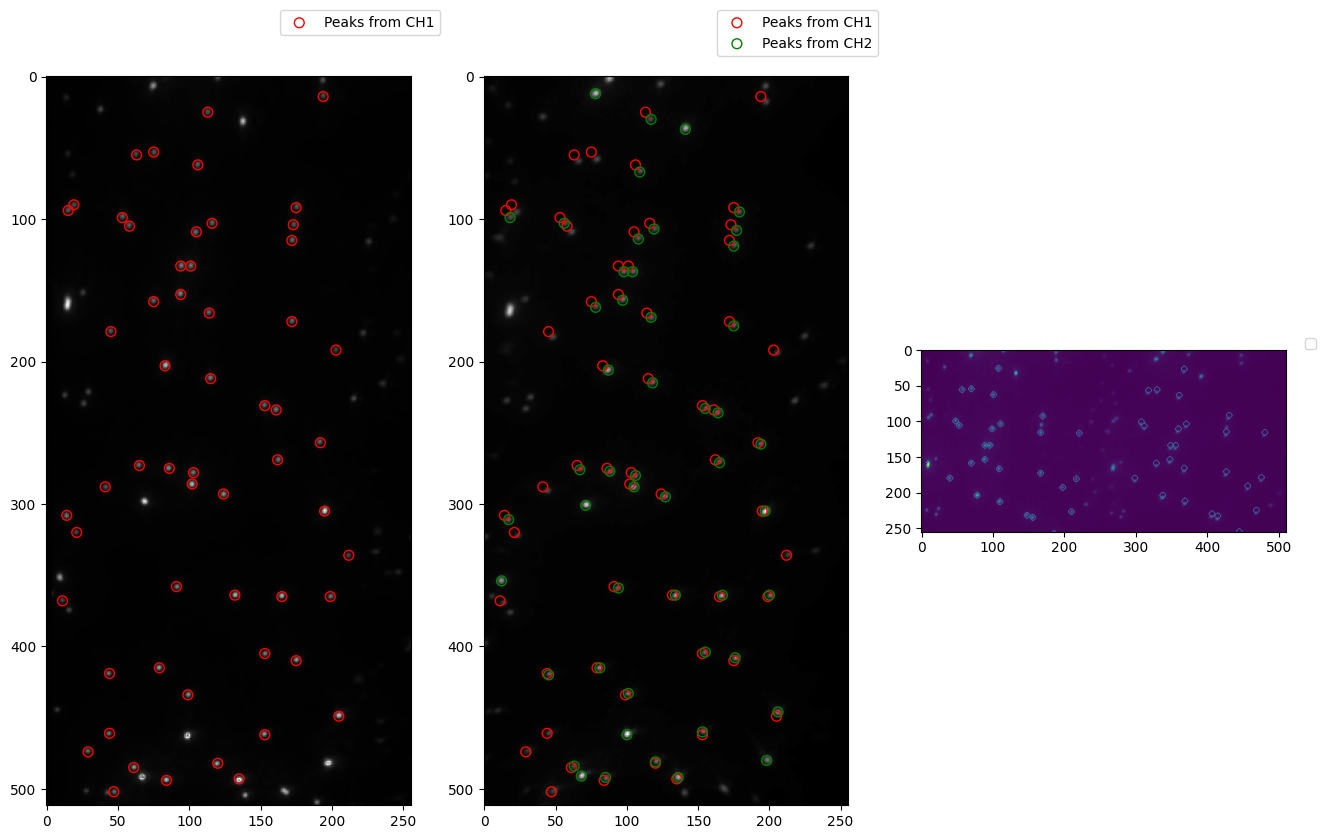

In [50]:
#Testing
good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2,_ = good_peak_finder(CH2_img_path)

f, axes = plt.subplots(1, 3, figsize=(16, 24))

axes[0].imshow(image_CH1, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

axes[1].imshow(image_CH2, cmap="gray")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[1].scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=50, facecolors='none', edgecolors='g', label='Peaks from CH2')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


axes[2].imshow(hel1_ave_image)
axes[2].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [52]:
# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = []
good_peaks_2_CH2 = []

for i in good_peaks_1:
    good_peaks_1_CH2.append(np.add(i, [0,256]))
for i in good_peaks_2:
    good_peaks_2_CH2.append(np.add(i, [0,256]))

good_peaks_1_CH2 = np.array(good_peaks_1_CH2)
good_peaks_2_CH2 = np.array(good_peaks_2_CH2)
print(good_peaks_1_CH2[:5])

[[493 391]
 [305 451]
 [494 340]
 [449 461]
 [286 358]]


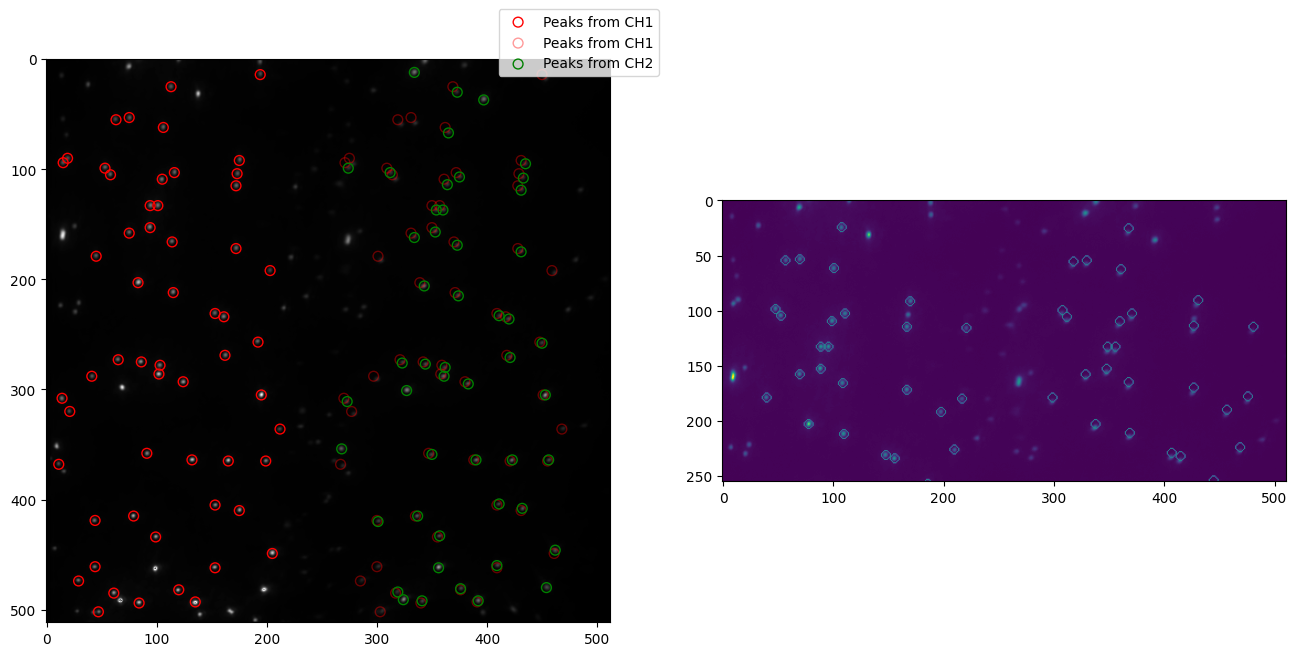

In [55]:
#All in one image!

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].imshow(image, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_1_CH2[:, 1], good_peaks_1_CH2[:, 0], s=50, facecolors='none', edgecolors='r', alpha=0.4, label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='g', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

axes[1].imshow(hel1_ave_image)
plt.show()


In [ ]:
# Average frame, CH1 and CH2 overlayed
avg_overlayed = ((avg_frame_data_CH1 + avg_frame_data_CH2) / 2).astype(np.uint8)
Overlay_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_Overlay.png"
overlay_img = io.imread(Overlay_img_path, as_gray=True)

#Dropbox path
average_path_DB = '../pma files/hel1_ave.tif'
average_DB_image = io.imread(average_path_DB)

